### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [4]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BmAzJqM73S2B8T1wOb8Gp5vzarBcn', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7cfd3b8b-728f-4bd8-afa0-45caa23db131-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am Vivek and I like to play soccer.")

AIMessage(content="\n<think>\nOkay, the user introduced himself as Vivek and mentioned he likes to play soccer. I should respond in a friendly way. Let me start by greeting him back. Maybe ask how long he's been playing or if he's part of a team. I can also mention some common soccer topics like favorite teams or players to keep the conversation going. Wait, should I use emojis here? The user didn't use any, but maybe a soccer ball emoji would be appropriate. Let me check the example response again. Oh right, the example used a soccer ball. I'll add that. Also, make sure to keep it open-ended so he feels comfortable sharing more. Maybe ask if he prefers playing or watching, or if there's a particular position he likes. Hmm, let me put that together in a natural way. Avoid making it too long. Alright, that should work.\n</think>\n\nHey Vivek! That’s awesome! 👋⚽ How long have you been playing soccer? Do you prefer a specific position on the field or any favorite teams/players? Let me kno

### We Will start With Creating Nodes

In [7]:
def superbot(state:State):
    return {"messages": [llm_groq.invoke(state['messages'])]}

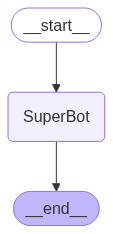

In [8]:
graph = StateGraph(State)

## node
graph.add_node("SuperBot", superbot)
## Edges

graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

graph_builder = graph.compile()

## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [9]:
## Invocation

graph_builder.invoke({'messages':"Hi, My name is Vievk And I like Soccer"})

{'messages': [HumanMessage(content='Hi, My name is Vievk And I like Soccer', additional_kwargs={}, response_metadata={}, id='e8eb6663-1168-470b-a904-bce47dab63bf'),
  AIMessage(content='\n<think>\nOkay, the user introduced themselves as Vievk and mentioned liking soccer. First, I should respond warmly to their greeting. Let me make sure to spell their name correctly—Vievk. Maybe they meant "Veek" or "Vivek"? But I\'ll stick with Vievk as written.\n\nI should acknowledge their interest in soccer. Maybe ask a follow-up question to keep the conversation going. Let\'s see, possible questions could be about their favorite team, players, or if they play soccer themselves. Since it\'s their first message, keeping it friendly and open-ended is best.\n\nI need to check if my response is in a friendly and approachable tone. Also, make sure it\'s not too long. Maybe something like, "Hi Vievk! Nice to meet you! Soccer is an amazing sport. Do you follow any particular team or player?" That should w

#### Streaming The responses

In [16]:
for event in graph_builder.stream({"messages":"Hello My name is Vivek"}):  # , stream_mode="values"
    print(event)

{'SuperBot': {'messages': [AIMessage(content='\n<think>\nOkay, the user said "Hello My name is Vivek." I need to respond appropriately. First, I should greet them back. Let me start with a friendly "Hello Vivek!" to acknowledge their name. Then, I can offer assistance by asking how I can help them. Keeping it open-ended so they can ask anything they need. Maybe add an emoji to keep it warm and approachable. Let me check for any typos. Yep, that looks good. Alright, send.\n</think>\n\nHello Vivek! 😊 How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 134, 'prompt_tokens': 16, 'total_tokens': 150, 'completion_time': 0.326134601, 'prompt_time': 0.00320594, 'queue_time': 0.018251935, 'total_time': 0.329340541}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'stop', 'logprobs': None}, id='run--e2db53a0-cbb5-4